# <center> Sparks Foundation (Task 1)

**Problem Statement:** predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading data 

In [2]:
# data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [3]:
# Check for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Observation:** There is no missing values

Text(0.5, 1.0, 'Scores Vs Hours')

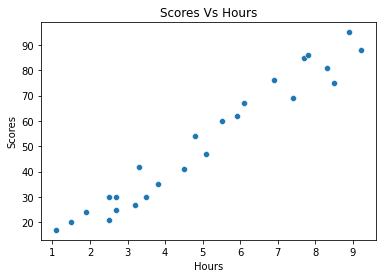

In [4]:
#sns.scatterplot(df["Hours"], df["Scores"])
sns.scatterplot(x="Hours", y="Scores",data=df)
plt.title('Scores Vs Hours')

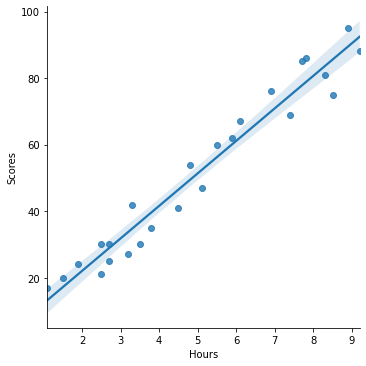

In [5]:
#a fitted line plotted using lmplot() from seaborn
sns.lmplot(x="Hours", y="Scores",data=df)

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Observation:** There is a positive linear relation between the number of hours studied and percentage of score.

### Data preprocessing

In [7]:
# divide the data into "attributes" (inputs) and "labels" (outputs).
X=df['Hours'].values
y=df['Scores'].values
print(X.shape, y.shape)

(25,) (25,)


In [8]:
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature
# Linear Regression with Sklearn requires object to be 2D-arrays.
# converting variables into 2D-arrays by using reshape(-1, 1) function
X=X.reshape(-1,1)
y=y.reshape(-1,1)
print(X.shape, y.shape)

(25, 1) (25, 1)


In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### ML training

In [10]:
from sklearn.linear_model import LinearRegression
Reg=LinearRegression()
Reg.fit(X_train,y_train)

LinearRegression()

$Score=\theta_{0} + \theta_{1} Hours + error$

$\theta_{0}$ : Intercept <br>
$\theta_{1}$ : coefficient

In [11]:
# Intercept
print('The intercept of simple linear regression is', Reg.intercept_)
# Coefficients
print('The Coefficients of simple linear regression is', Reg.coef_)

The intercept of simple linear regression is [2.01816004]
The Coefficients of simple linear regression is [[9.91065648]]


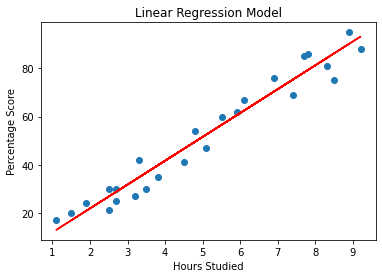

In [12]:
# Plotting the regression line
line = Reg.coef_*X+Reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red')
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

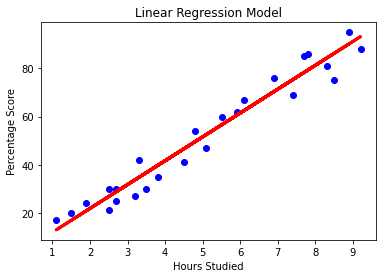

In [13]:
y_score=Reg.predict(X)
plt.scatter(X, y, color='blue')
plt.plot(X, y_score, color='red', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Model Prediction

In [14]:
y_pred=Reg.predict(X_test)

### Model Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print (f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print (f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print (f'Score: {Reg.score(X_test,y_test)}')

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Score: 0.9454906892105356


### Model save

In [16]:
import joblib
joblib.dump(Reg,'Student_Score_Model.pkl')

['Student_Score_Model.pkl']

In [17]:
# check the saved Model
Model=joblib.load('Student_Score_Model.pkl')
hour=5.9
hour=X_test
Model.predict(hour)

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [18]:
hour=5.9
Score=Model.predict(np.array(hour).reshape(-1,1))

In [19]:
# check the saved Model
hour=5.9
Score=Model.predict(np.array(hour).reshape(-1,1)).flatten()[0]
print(f'Predicted Score for {hour} studying hours is {np.round(Score,2)}')

Predicted Score for 5.9 studying hours is 60.49


# <center> The End